# Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

# Parameter estimation by optimization

When doing statistical inference, we speak the language of probability. A probability distribution that describes your data has parameters. So, a major goal of statistical inference is to estimate the values of these parameters, which allows us to concisely and unambiguously describe our data and draw conclusions from it. We will find the optimal parameters, those that best describe your data.


## Optimal parameters


> ### Optimal parameters
- Parameter values that bring the model in closest agreement with the data

> ### Packages to do statistical inference
| |package|
|---|---|
|<img src="https://docs.scipy.org/doc/scipy/reference/_static/img/scipy_org_logo.png" alt="scipy_org_logo" width="250">|`scipy.stats`|
|<img src="https://www.statsmodels.org/stable/_images/statsmodels-logo-v2-horizontal.svg" alt="statsmodels-logo-v2-horizontal" width="250">|`statsmodels`|
|<img src="https://numpy.org/images/logos/numpy.svg" alt="numpy" style="height:50px">| hacker stats with `numpy`|


### How often do we get no-hitters?


The number of games played between each no-hitter in the modern era ($1901-2015$) of Major League Baseball is stored in the array `nohitter_times.`

In [2]:
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
                           715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
                           104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
                           166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
                           308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
                           1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
                           77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
                           557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
                           1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
                           219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
                           176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
                           774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
                           192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
                           156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
                           576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
                           3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
                           110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
                           192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
                           1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
                           2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
                           1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
                           420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
                           876,  381,  905,  156,  419,  239,  119,  129,  467])

If we assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As we have seen, the Exponential distribution has a single parameter, which we will call τ, the typical interval time. The value of the parameter τ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

We will compute the value of this parameter from the data. Then, `use np.random.exponential()` to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the τ we found and plot the histogram as an approximation to the PDF.

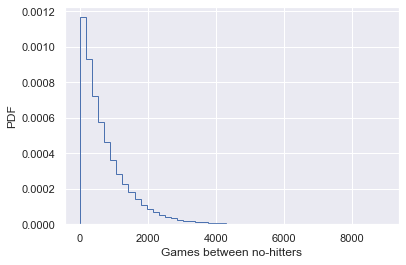

In [4]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype="step")
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


> Note: We see the typical shape of the Exponential distribution, going from a maximum at 0 and decaying to the right.

### Do the data follow our story?

We have modeled no-hitters using an Exponential distribution. Let's create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps us to verify that the Exponential distribution describes the observed data.

In [ ]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker=".", linestyle="none")

# Margins and axis labels
plt.margins(.2)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()
